In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("Daily_Water_Intake.csv")

In [5]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)',
       'Physical Activity Level', 'Weather', 'Hydration Level'],
      dtype='object')

In [6]:
data.shape

(30000, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [10]:
data.describe()

,Age,Weight (kg),Daily Water Intake (liters)
count,30000.000000,30000.00000,30000.000000
mean,43.467667,76.84860,2.852444
std,14.998940,18.74494,0.835537
min,18.000000,45.00000,1.500000
25%,30.000000,61.00000,2.220000
50%,43.000000,77.00000,2.830000
75%,56.000000,93.00000,3.440000
max,69.000000,109.00000,5.430000


In [11]:
data.isnull().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

In [13]:
data['Daily Water Intake (liters)'].nunique()

390

In [15]:
data['Gender'].nunique()

2

In [16]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [18]:
num_columns=[i for i in data.columns if data[i].dtype!='O']

In [20]:
num_columns=[]
for i in data.columns:
    if data[i].dtype!='O':
        num_columns.append(i)
    

In [21]:
num_columns

['Age', 'Weight (kg)', 'Daily Water Intake (liters)']

In [22]:
obj_columns=[]
for i in data.columns:
    if data[i].dtype=='O':
        obj_columns.append(i)

In [23]:
obj_columns

['Gender', 'Physical Activity Level', 'Weather', 'Hydration Level']

In [25]:
import warnings
warnings.filterwarnings("ignore")

[]

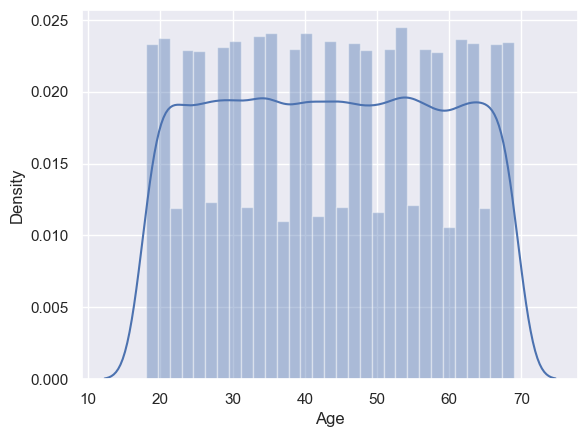

In [26]:
sns.set(style="darkgrid")
sns.distplot(data['Age'])
plt.plot()

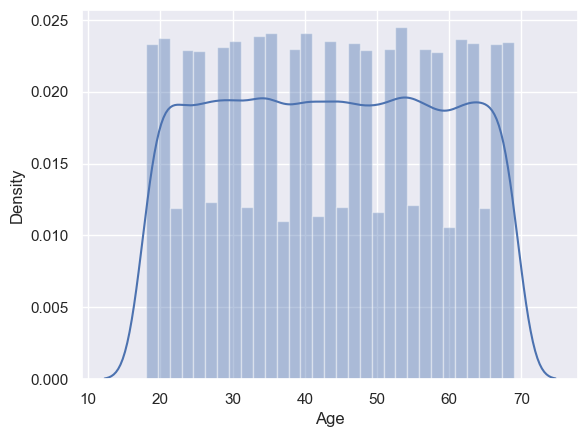

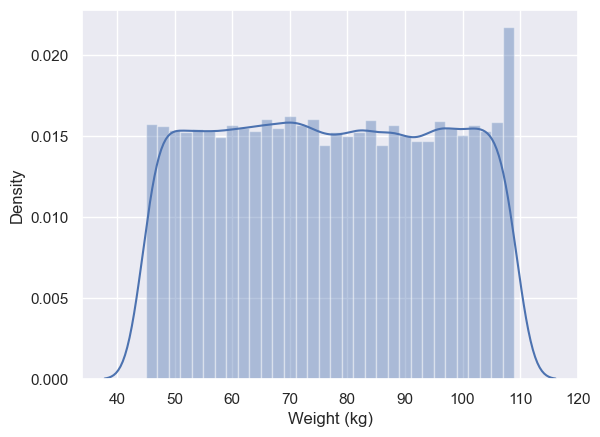

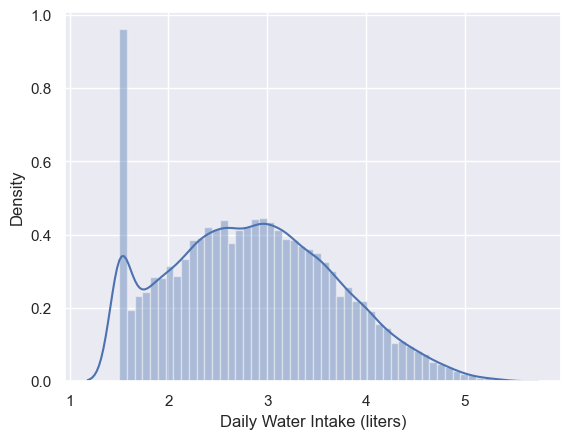

In [28]:
sns.set(style="darkgrid")
for i in num_columns:
    sns.distplot(data[i])
    plt.show()

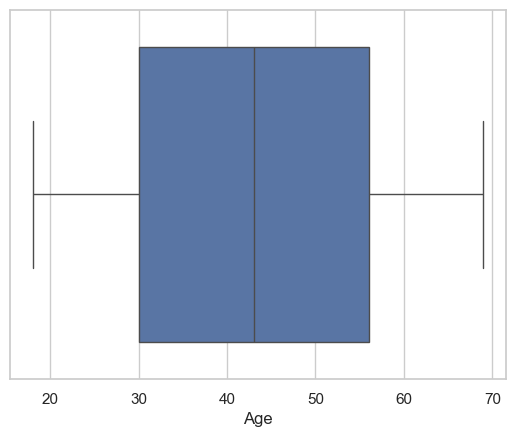

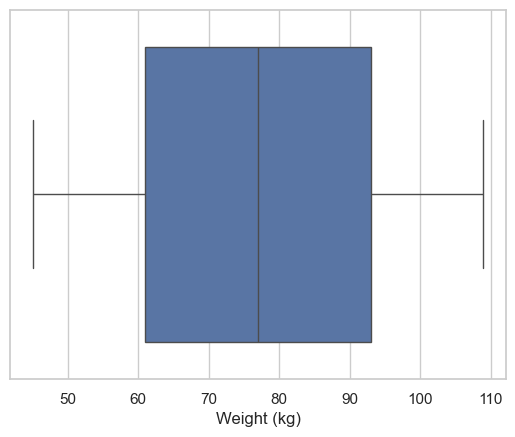

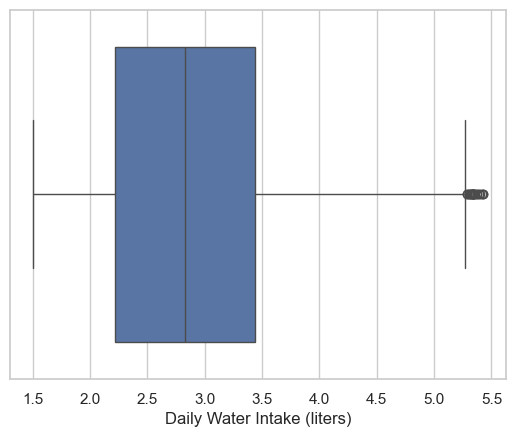

In [30]:
sns.set(style="whitegrid")
for i in num_columns:
    sns.boxplot(data[i],orient='h')
    plt.show()

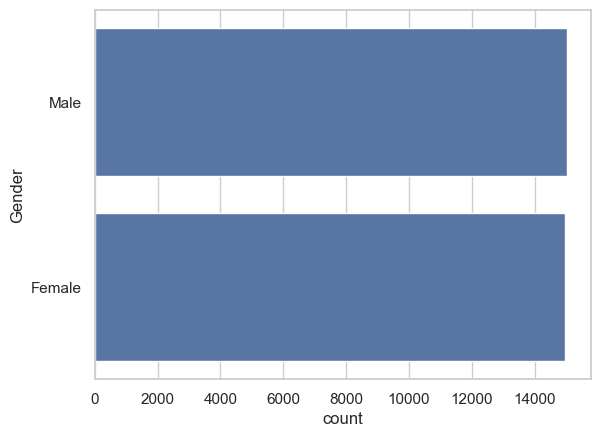

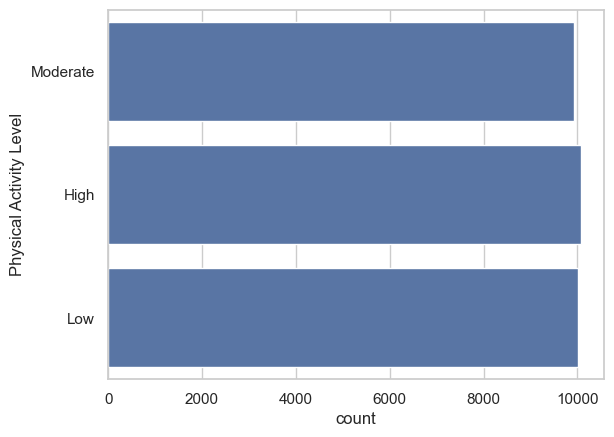

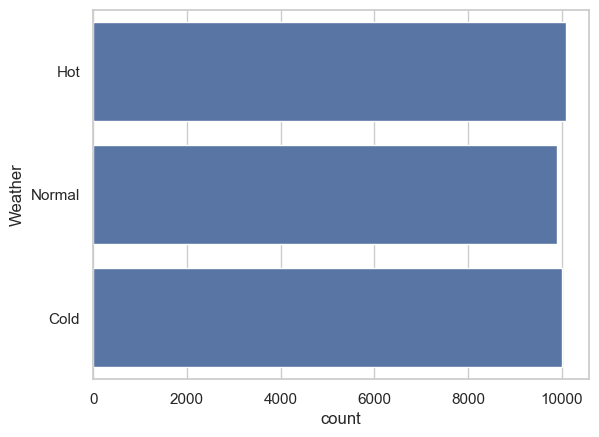

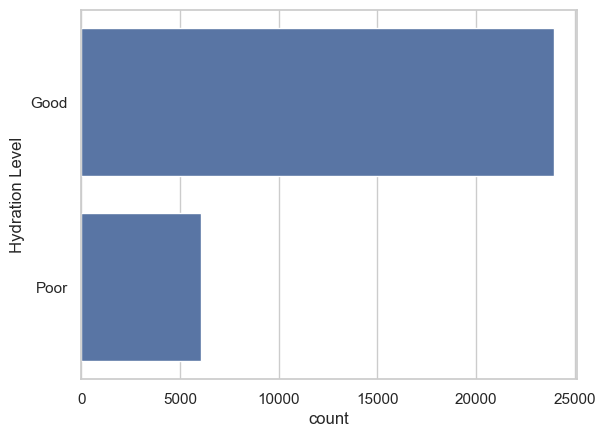

In [32]:
sns.set(style="whitegrid")
for i in obj_columns:
    sns.countplot(data[i])
    plt.show()

In [33]:
obj_columns

['Gender', 'Physical Activity Level', 'Weather', 'Hydration Level']

# 'Gender'

In [34]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
data['Gender']=data['Gender'].replace({"Male":0,"Female":1})

In [36]:
data['Gender'].unique()

array([0, 1])

In [37]:
obj_columns.remove('Gender')

In [38]:
obj_columns

['Physical Activity Level', 'Weather', 'Hydration Level']

# 'Physical Activity Level'

In [39]:
data['Physical Activity Level'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [40]:
data['Physical Activity Level']=data['Physical Activity Level'].replace({
    'Moderate':0, 'High':1, 'Low':2})

In [41]:
data['Physical Activity Level'].unique()

array([0, 1, 2])

In [42]:
obj_columns.remove('Physical Activity Level')

In [43]:
obj_columns

['Weather', 'Hydration Level']

# 'Weather'

In [44]:
data['Weather'].unique()

array(['Hot', 'Normal', 'Cold'], dtype=object)

In [45]:
data['Weather']=data['Weather'].replace({'Hot':0, 'Normal':1, 'Cold':2})

In [46]:
data['Weather'].unique()

array([0, 1, 2])

# 'Hydration Level'

In [48]:
data['Hydration Level'].unique()

array(['Good', 'Poor'], dtype=object)

In [49]:
data['Hydration Level']=data['Hydration Level'].replace({'Good':1, 'Poor':0})

In [50]:
data['Hydration Level'].unique()

array([1, 0])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  int64  
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  int64  
 5   Weather                      30000 non-null  int64  
 6   Hydration Level              30000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [54]:
features=data.drop('Hydration Level',axis=1)
features.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)',
       'Physical Activity Level', 'Weather'],
      dtype='object')

In [55]:
target=data['Hydration Level']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=40)

In [58]:
x_train.shape,x_test.shape

((24000, 6), (6000, 6))

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [60]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
model_predict=rf.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

In [63]:
accuracy_score(y_test,model_predict)

0.9891666666666666

In [64]:
print(classification_report(y_test,model_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1218
           1       0.99      1.00      0.99      4782

    accuracy                           0.99      6000
   macro avg       0.99      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000

